In [1]:
import random
import gensim
import pickle
import pandas as pd
from dask import dataframe as pd1

import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()


import nltk
from nltk.corpus import wordnet as wn
en_stop = set(nltk.corpus.stopwords.words('english'))

from nltk.stem.wordnet import WordNetLemmatizer

from gensim import corpora
from gensim.models import ldamodel, LdaMulticore, CoherenceModel

import matplotlib.pyplot as plt

In [2]:
#nltk.download('omw-1.4')

In [3]:
folder = "../data/mgp_data/"

In [4]:
publication = pd1.read_csv(folder+"dblp_publication_data_for_mgp_researchers.csv")

In [5]:
publication.columns

Index(['mgp_id', 'title', 'author', 'year', 'ptype', 'url'], dtype='object')

In [6]:
#removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']

In [7]:
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        #print(token)
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [8]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [9]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [11]:
# text_data = []
# for index, line in publication.iterrows():
#     #print(line["title"])
#     tokens = prepare_text_for_lda(line["title"])
# #     if random.random() > .99:
# #         print(line["title"])
# #         print(tokens)
#     text_data.append(tokens)

In [ ]:
text_data = [prepare_text_for_lda(line["title"]) for index, line in publication.iterrows()]

In [11]:
def prepare_corpora(text_data):
    dictionary = corpora.Dictionary(text_data)
    dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=10000)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')
    return (corpus, dictionary)

In [ ]:
#dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=1000)

In [ ]:
print(dictionary.token2id)

In [ ]:
corpus, dictionary = prepare_corpora(text_data)

In [ ]:
len(list(dictionary.items()))

In [55]:
def model_train(corpus, dictionary)
    NUM_TOPICS = 20
    ldamodel = ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    ldamodel.save('topic_model.gensim')
    topics = ldamodel.print_topics(num_words=4)
#     for topic in topics:
#         print(topic)
    return ldamodel

(0, '0.152*"system" + 0.095*"control" + 0.045*"power" + 0.033*"adaptive"')
(1, '0.038*"point" + 0.037*"model" + 0.035*"identification" + 0.027*"hierarchical"')
(2, '0.075*"design" + 0.037*"software" + 0.037*"system" + 0.031*"scheduling"')
(3, '0.074*"multi" + 0.055*"distribute" + 0.049*"system" + 0.036*"base"')
(4, '0.052*"optimal" + 0.047*"linear" + 0.042*"function" + 0.029*"theory"')
(5, '0.049*"technique" + 0.034*"fault" + 0.030*"mechanism" + 0.024*"layer"')
(6, '0.047*"scheme" + 0.047*"multiple" + 0.033*"generation" + 0.032*"query"')
(7, '0.036*"base" + 0.032*"visual" + 0.031*"tracking" + 0.029*"filter"')
(8, '0.054*"equation" + 0.043*"solution" + 0.042*"order" + 0.034*"international"')
(9, '0.189*"network" + 0.048*"wireless" + 0.043*"sensor" + 0.035*"mobile"')
(10, '0.058*"performance" + 0.044*"analysis" + 0.044*"evaluation" + 0.037*"architecture"')
(11, '0.046*"recognition" + 0.036*"online" + 0.035*"base" + 0.026*"sequence"')
(12, '0.086*"problem" + 0.063*"optimization" + 0.051*"

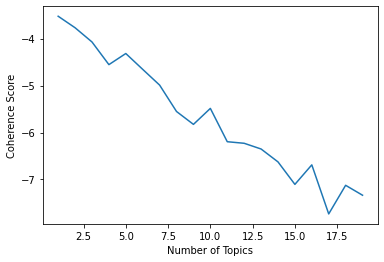

In [61]:
def model_Behaviour(corpus, dictionary):
    topics = []
    score = []
    perplexity = []
    for i in range(1,20,1):
        lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
        cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')#c_v
        topics.append(i)
        perplexity.append(lda_model.log_perplexity(corpus))
        score.append(cm.get_coherence())
    _=plt.plot(topics, score)
    _=plt.plot(topics, perplexity)
    _=plt.xlabel('Number of Topics')
    _=plt.ylabel('Coherence Score')
    plt.show()

In [ ]:
new_doc = 'Practical Bayesian Optimization of Machine Learning Algorithms'
new_doc = prepare_text_for_lda(new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

In [31]:
random.random()

0.3964802179835647

In [38]:
#tokenize('Representing algebraic integers as linear combinations of units.')

Representing
algebraic
integers
as
linear
combinations
of
units
.


['representing',
 'algebraic',
 'integers',
 'as',
 'linear',
 'combinations',
 'of',
 'units',
 '.']

In [40]:
#prepare_text_for_lda("Representing algebraic integers as linear combinations of units.")

Representing
algebraic
integers
as
linear
combinations
of
units
.


['represent', 'algebraic', 'integer', 'linear', 'combination', 'unit']